### Importing required libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')

In [243]:
df=pd.read_csv('data_breast.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## EDA

In [244]:
df.shape

(569, 33)

In [245]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  569
Number of columns:  33


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [247]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Dropping unnecessory columns

In [248]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [249]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Checking if there is any null values

In [250]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Checking if any duplicated values

In [251]:
df.duplicated().any()

False

In [252]:
df.duplicated().sum()

0

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [254]:
df['diagnosis'].sample(5)

233    M
442    B
35     M
216    B
230    M
Name: diagnosis, dtype: object

In [255]:
df['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [256]:
df['diagnosis'].sample(5)

229    1
313    0
9      1
447    0
52     0
Name: diagnosis, dtype: int64

In [257]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

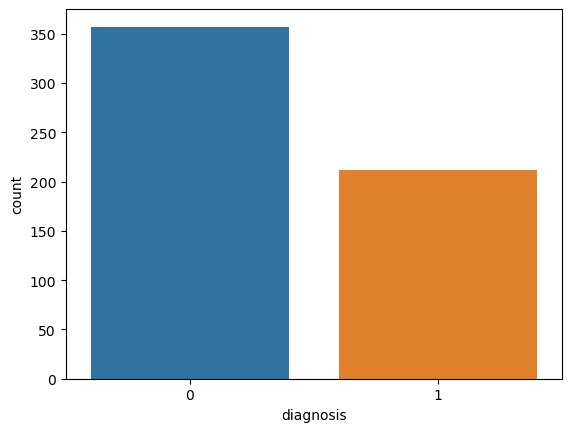

In [258]:
sns.countplot(x=df['diagnosis'],data=df)

In [259]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [260]:
corr=df.corr()

<Axes: >

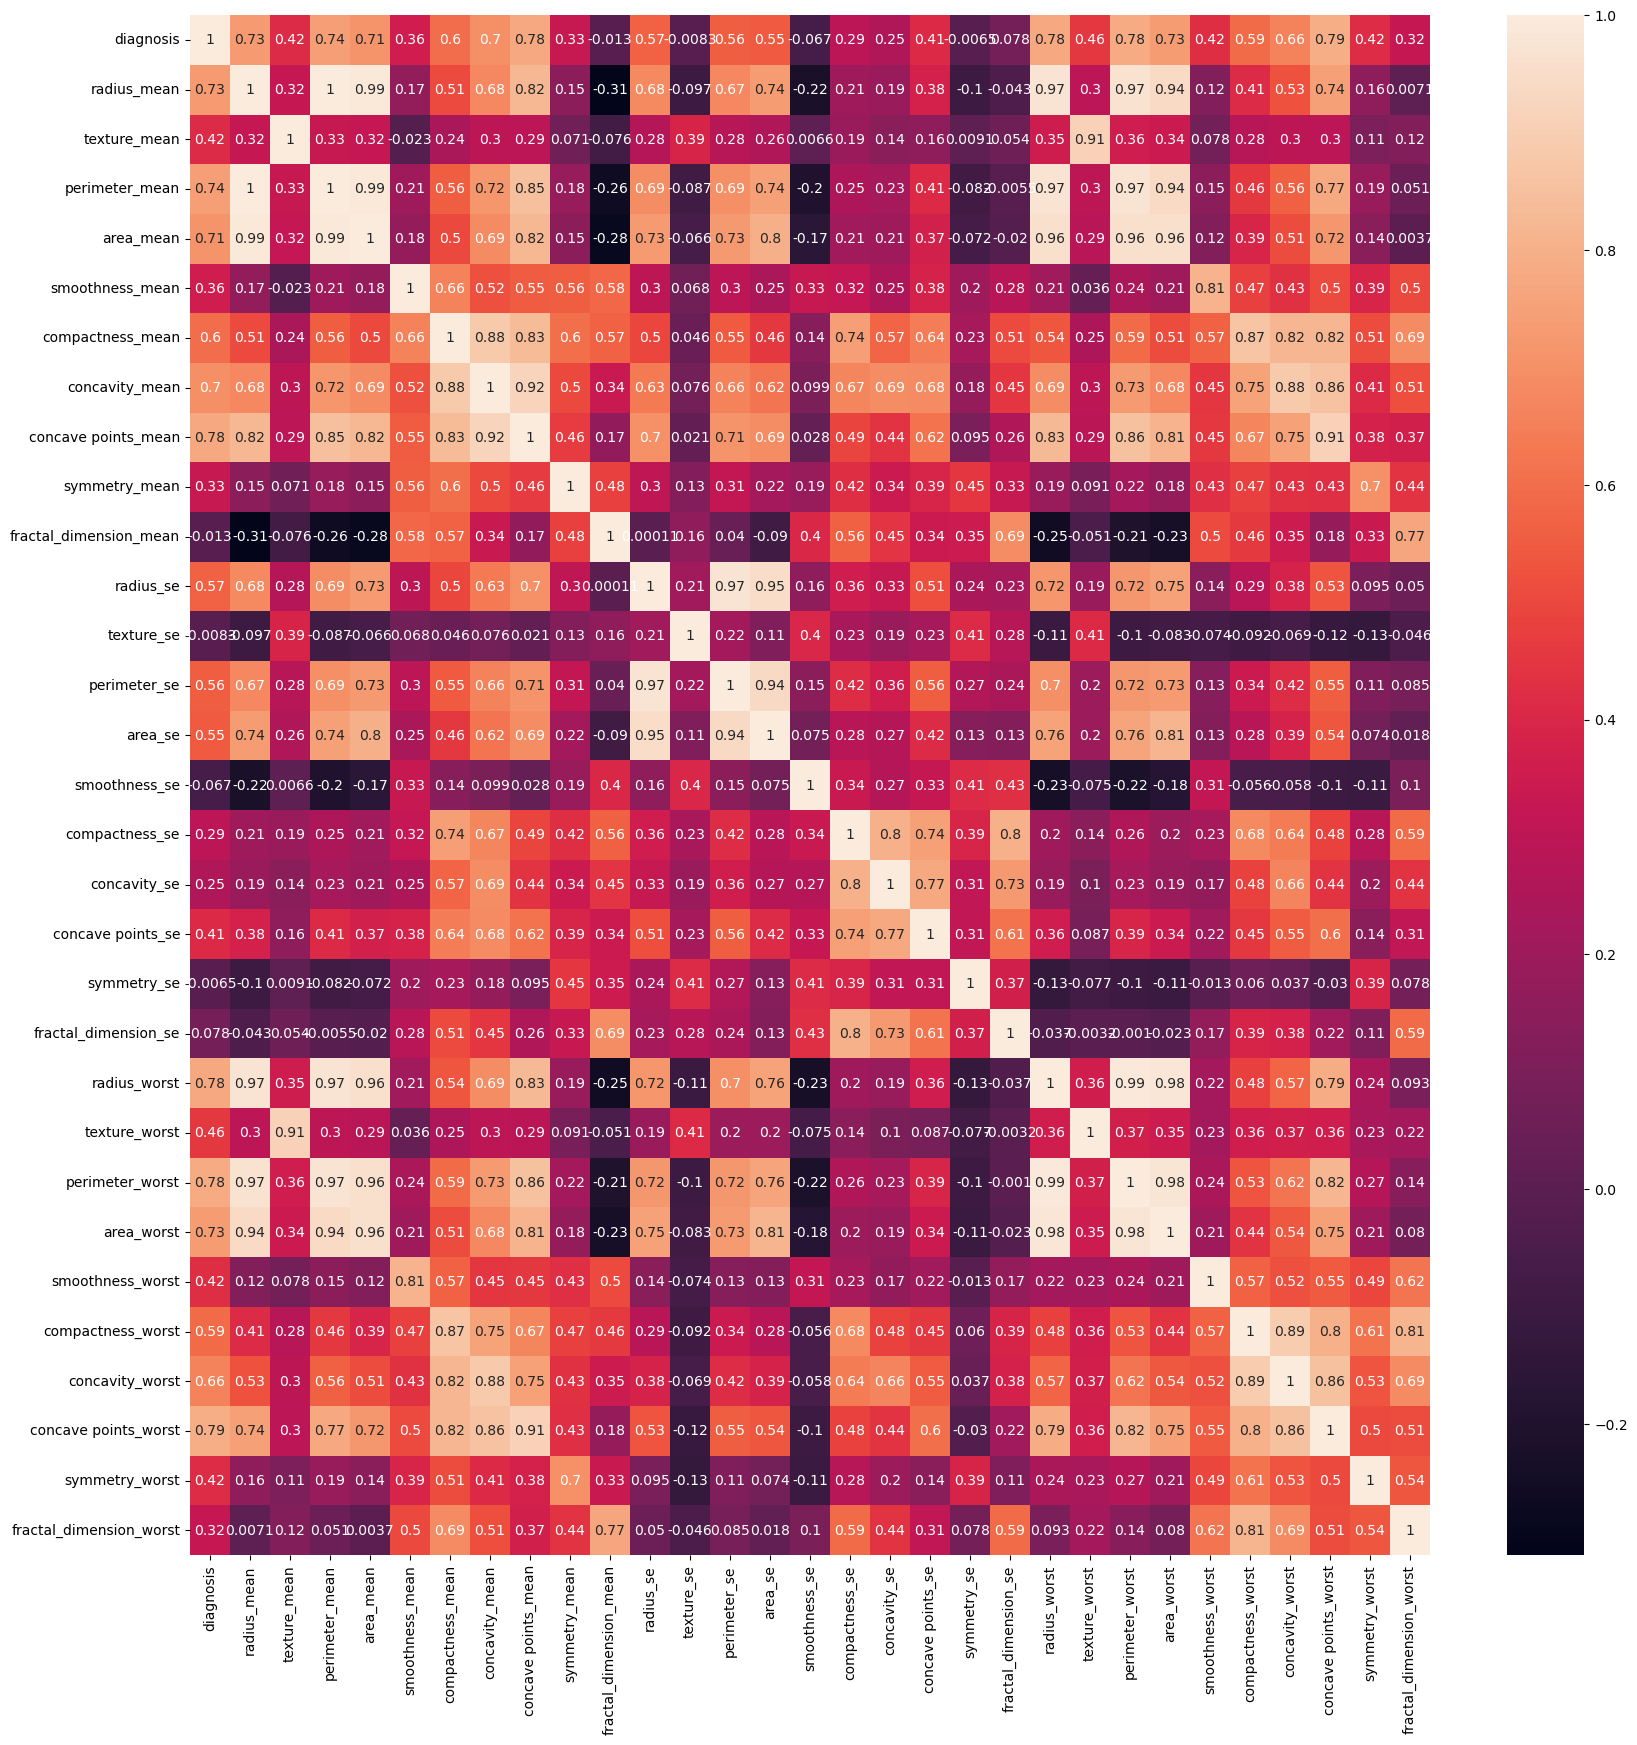

In [261]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [262]:
# sns.pairplot(df)

### OUTLIERS

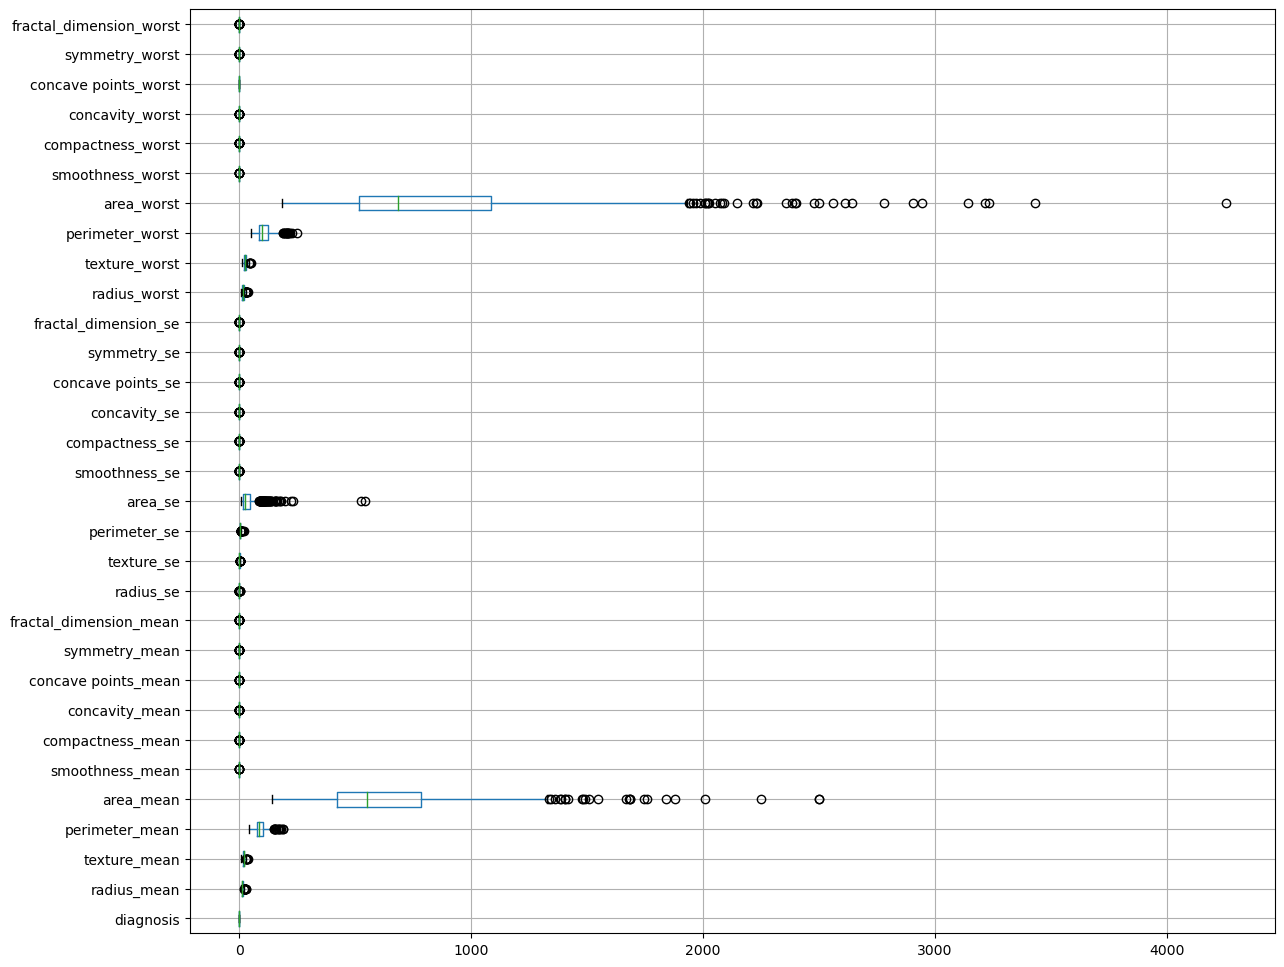

In [263]:
plt.figure(figsize=(14,12))
df.boxplot(vert=0)
plt.show()

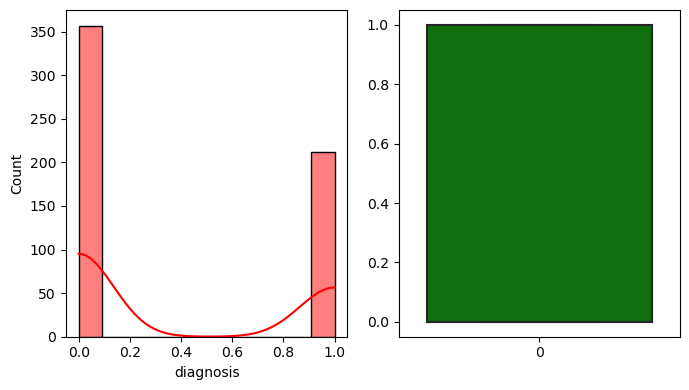

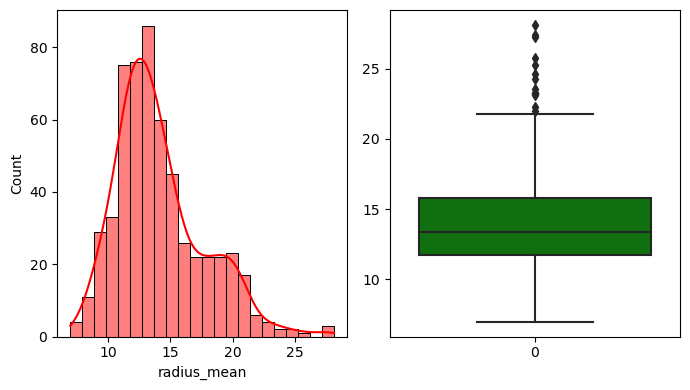

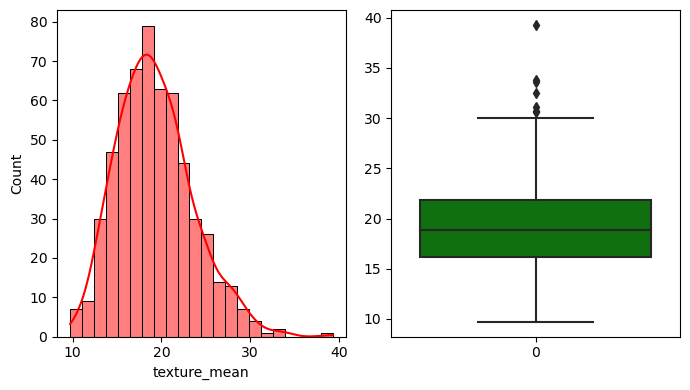

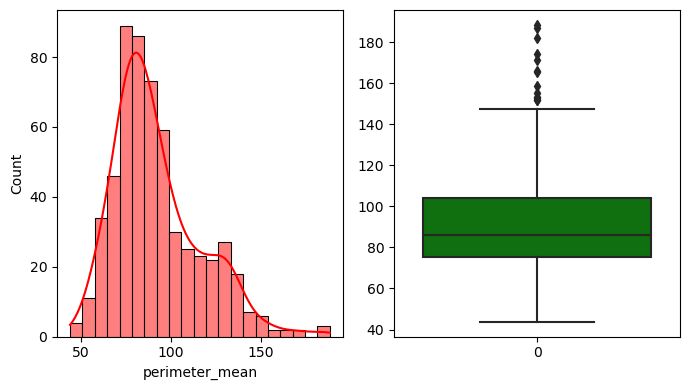

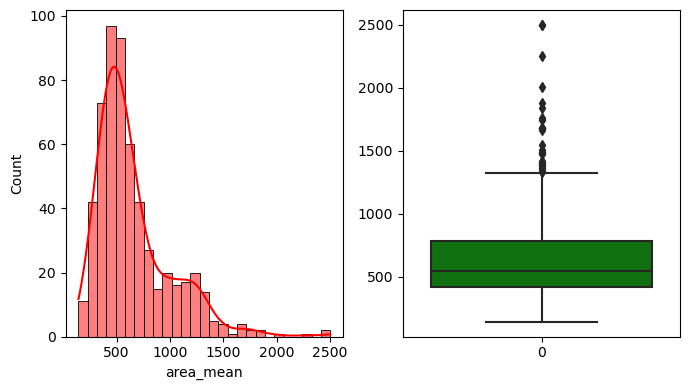

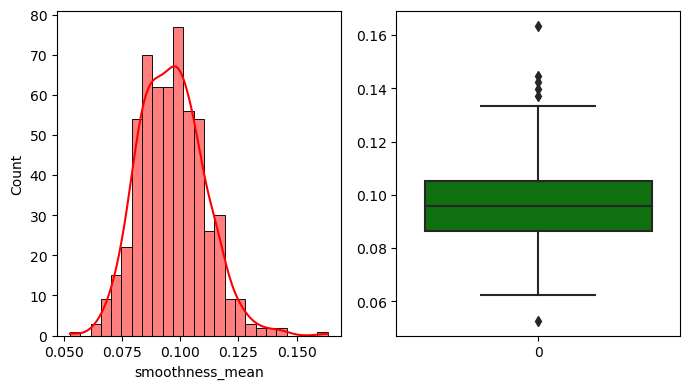

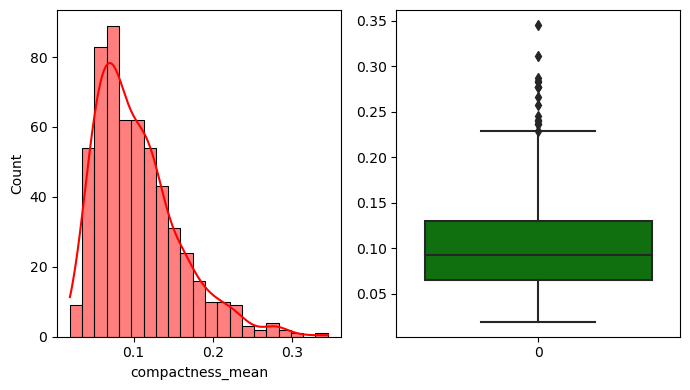

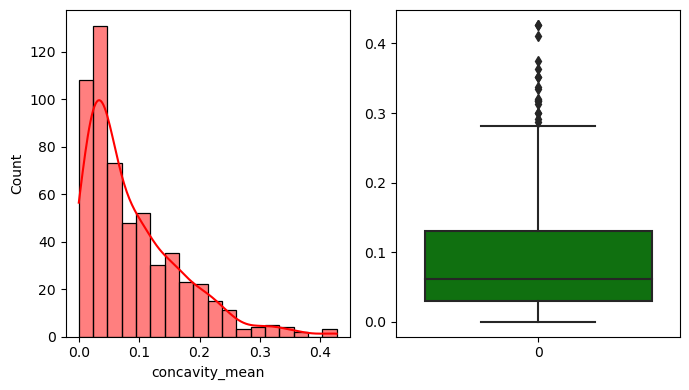

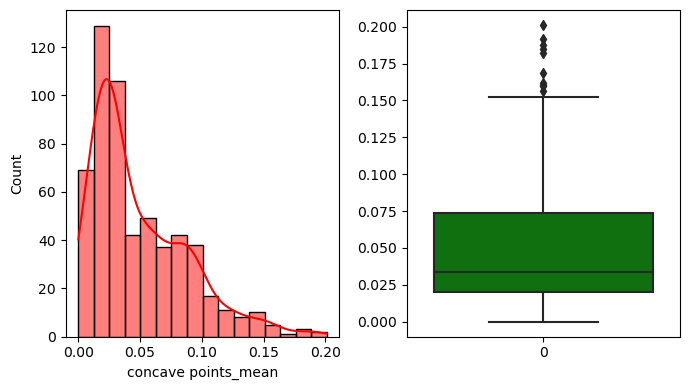

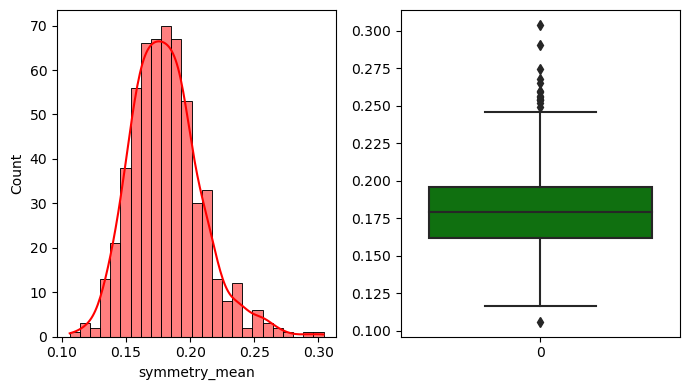

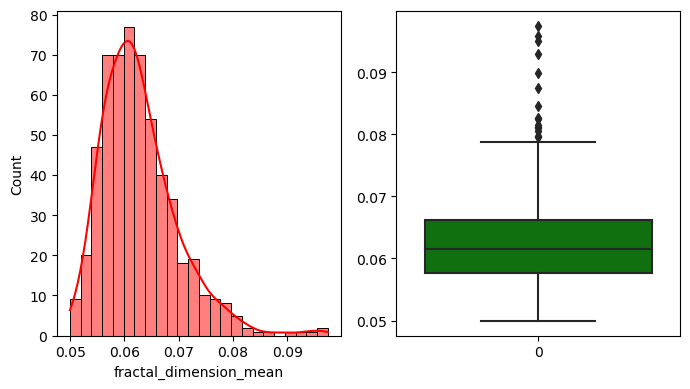

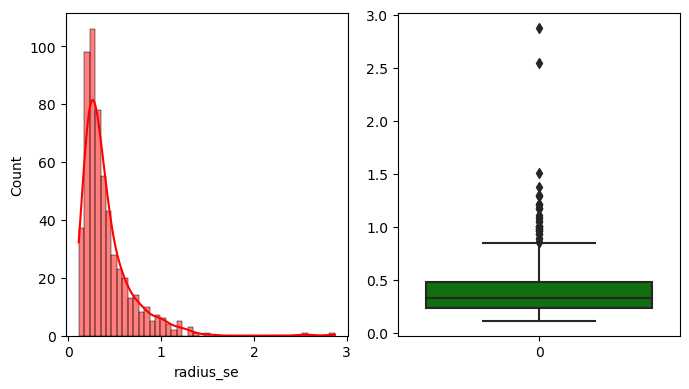

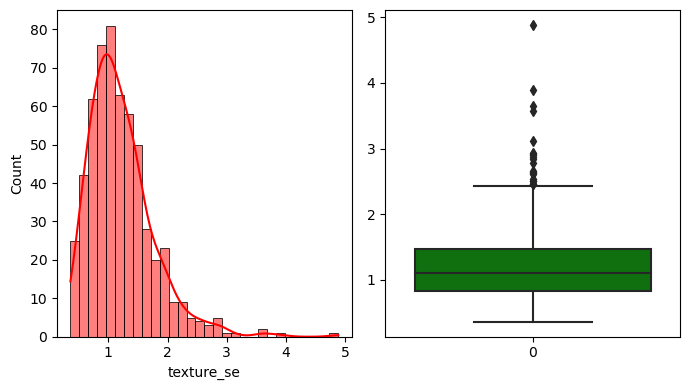

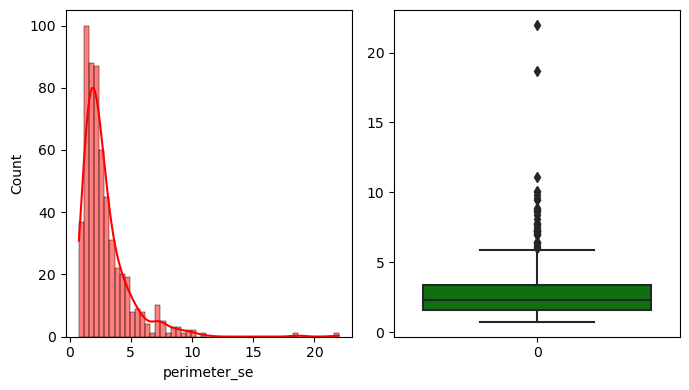

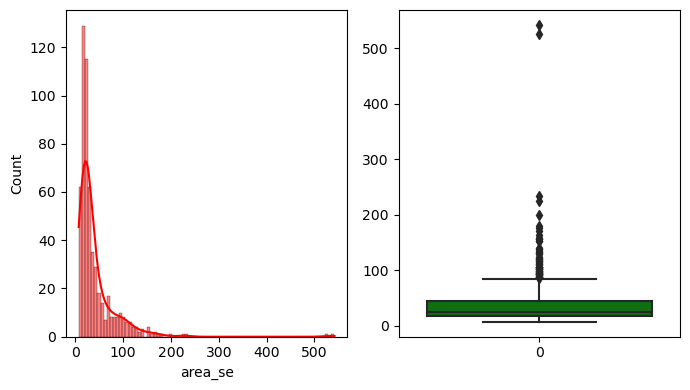

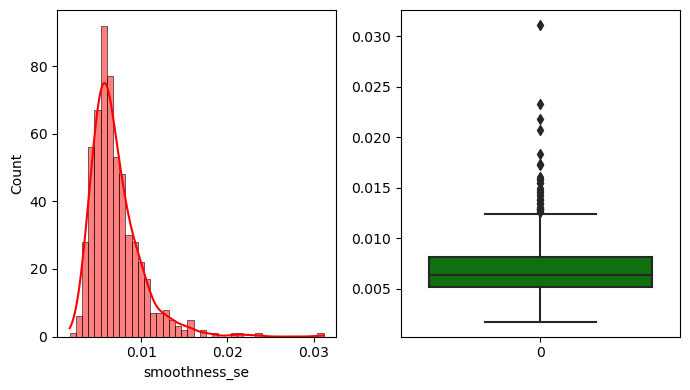

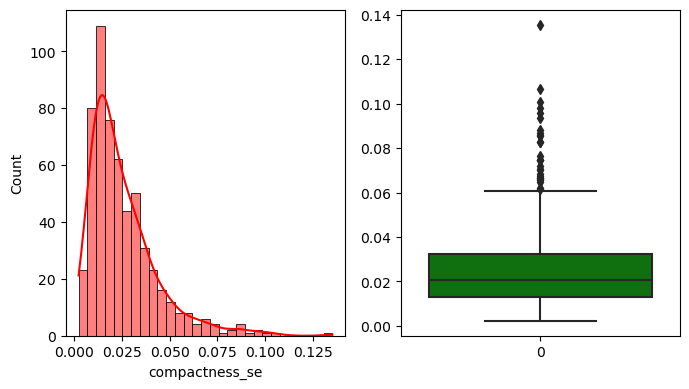

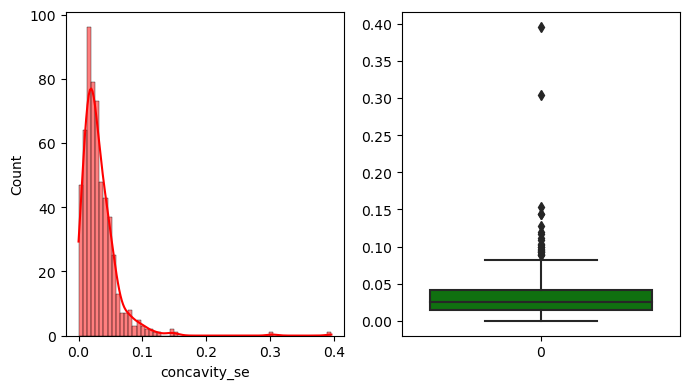

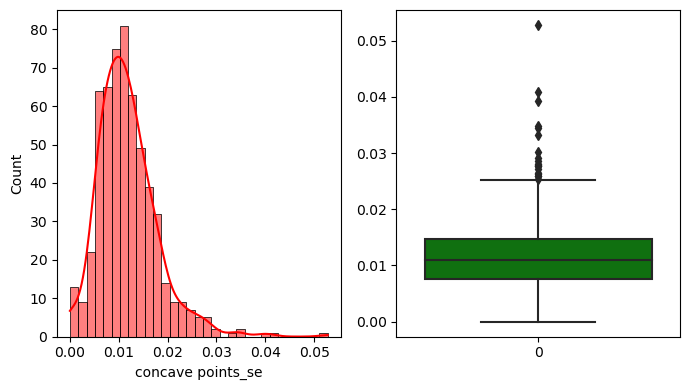

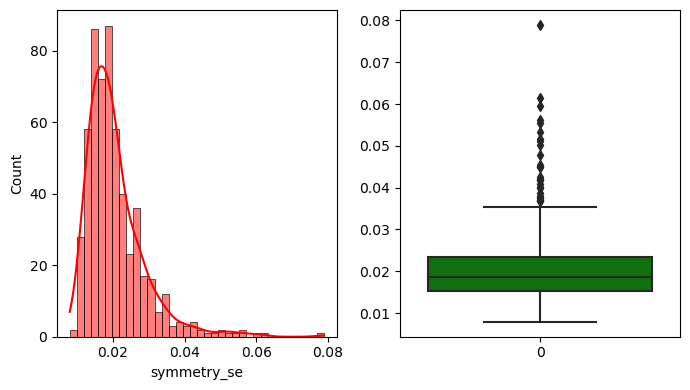

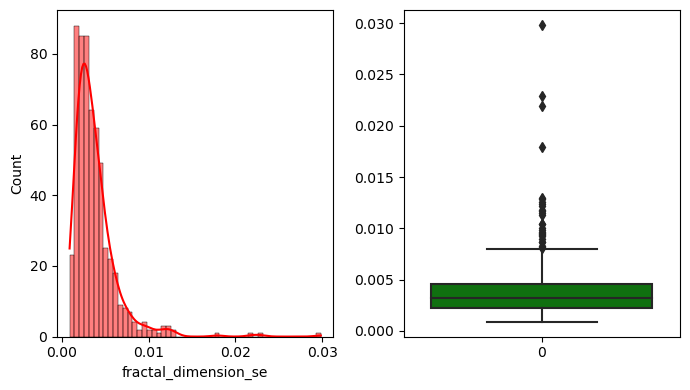

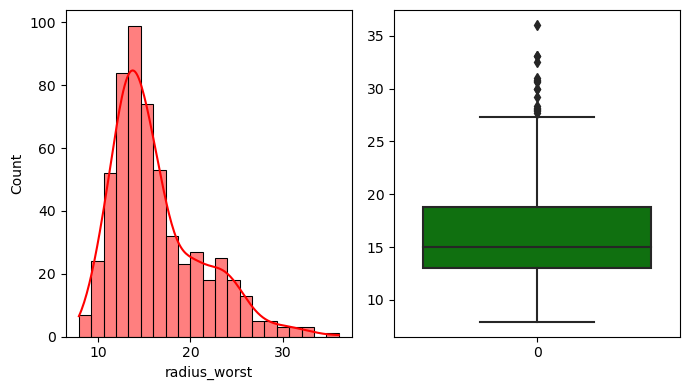

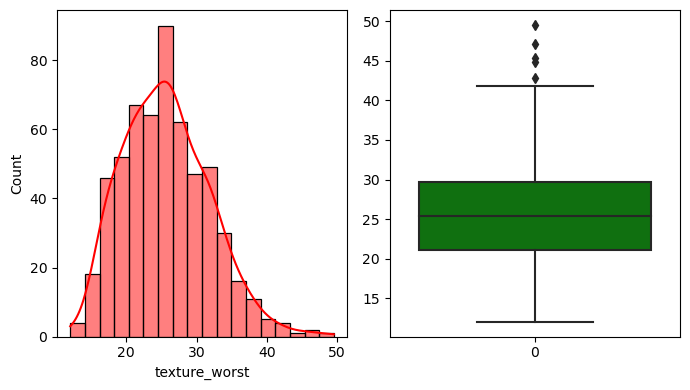

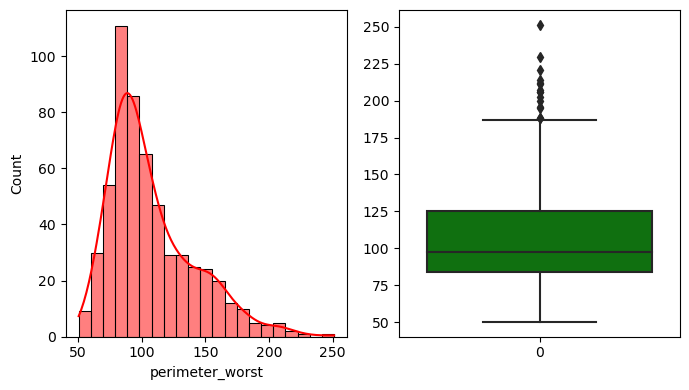

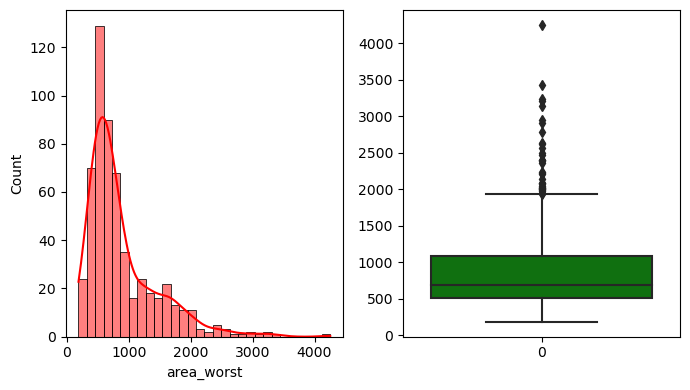

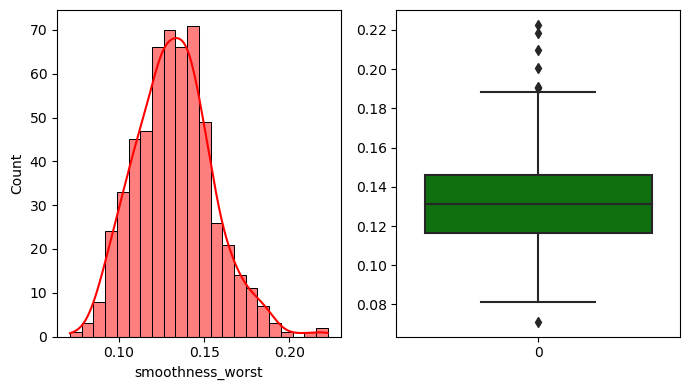

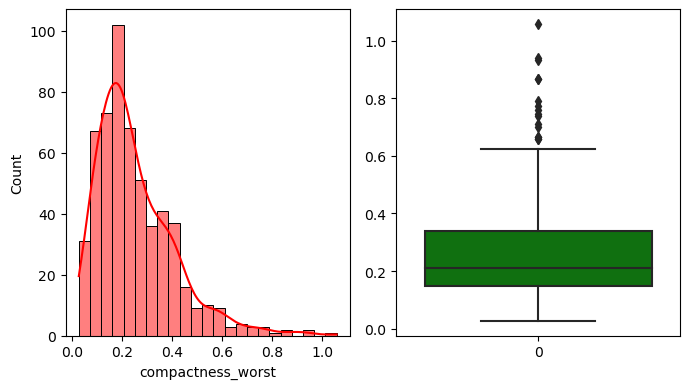

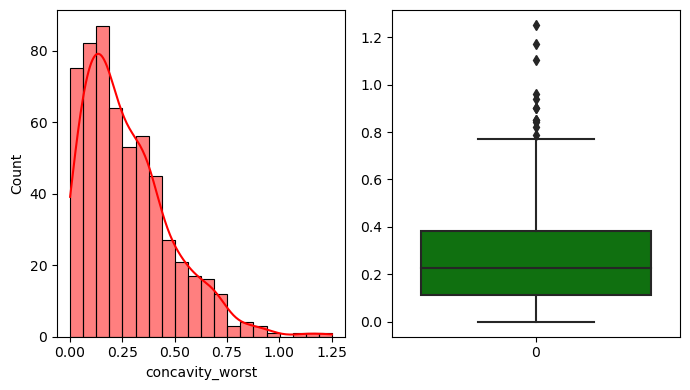

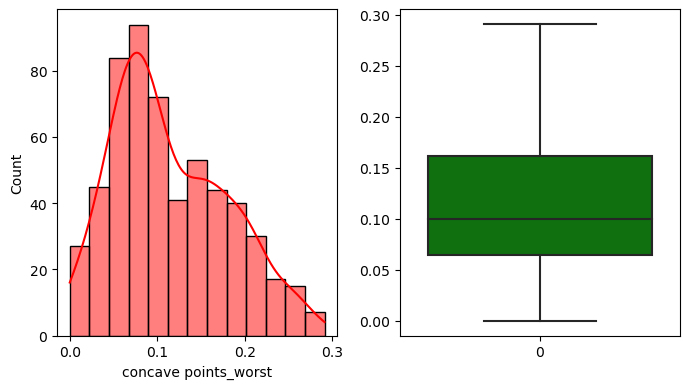

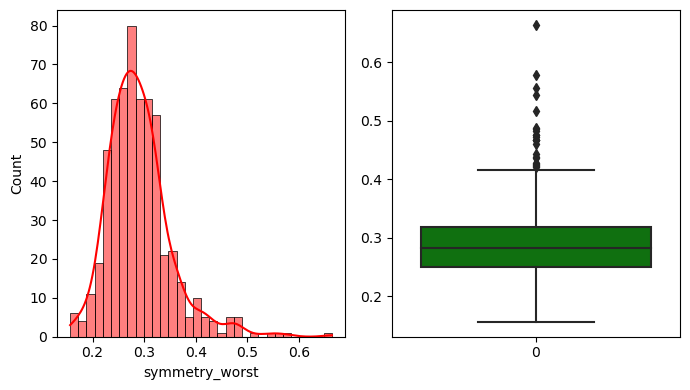

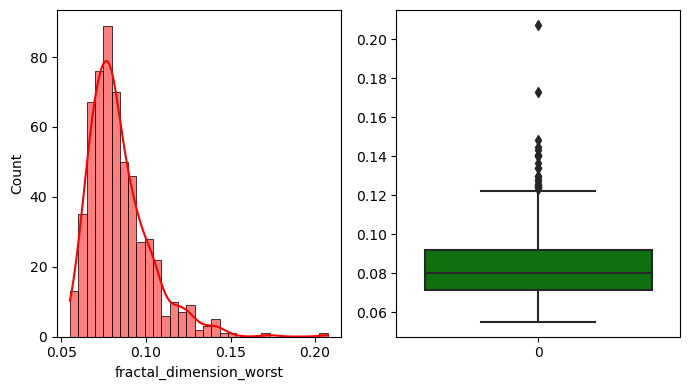

In [264]:
for i in df:
    plt.figure(figsize=(7,4))
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde=True,color='red')
    plt.subplot(1,2,2)
    sns.boxplot(df[i],color='green')
    plt.tight_layout()

    plt.show()

## HANDLING THE OUTLIERS

In [266]:
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5 * IQR)
    upper=Q3+(1.5 * IQR)
    df= df[(df[col] >= lower) & (df[col] <= upper)]

    

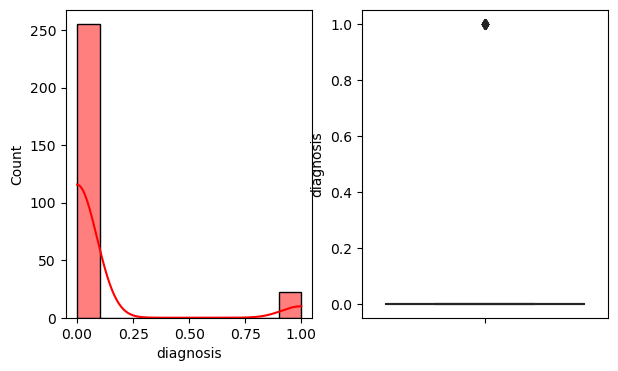

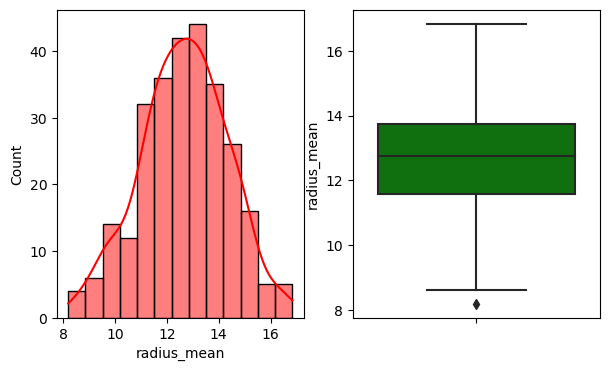

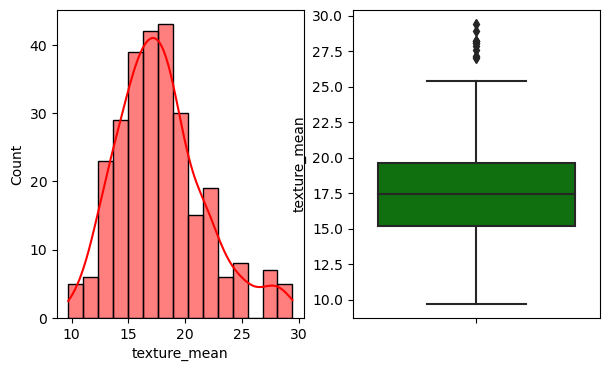

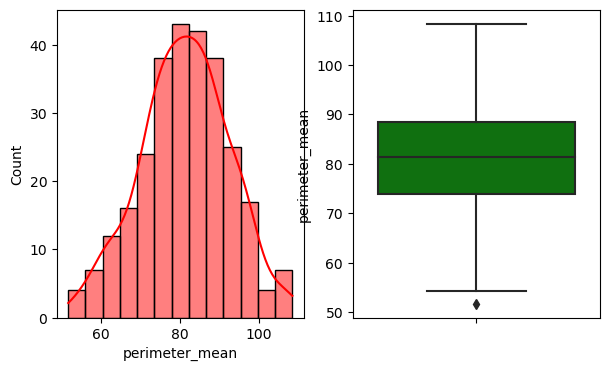

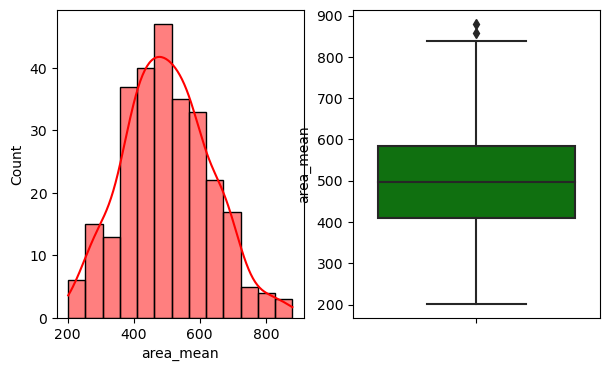

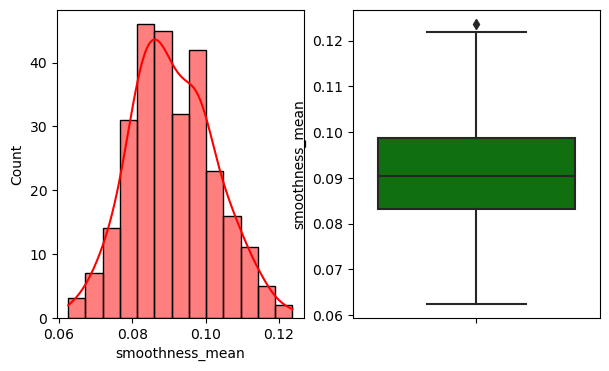

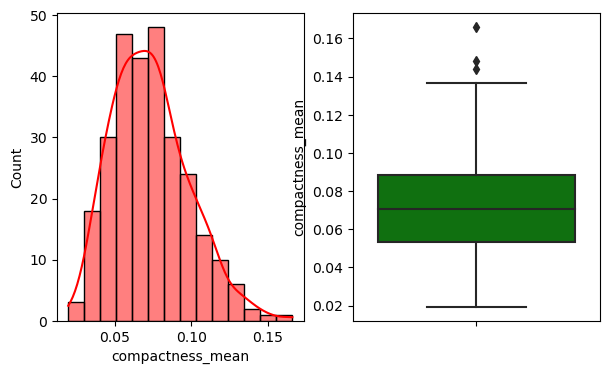

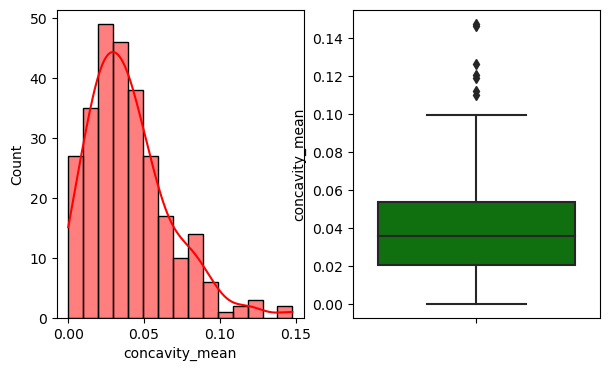

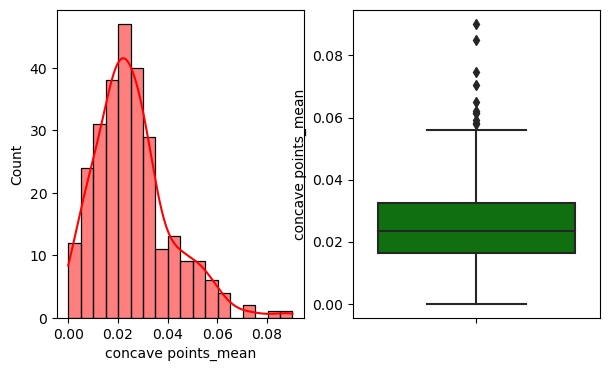

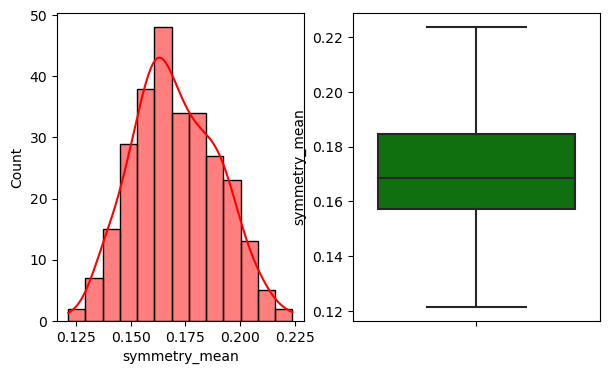

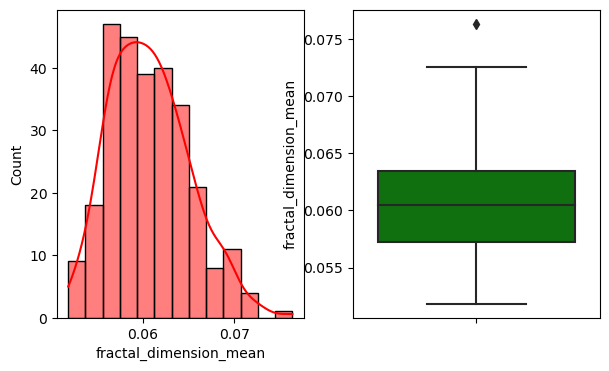

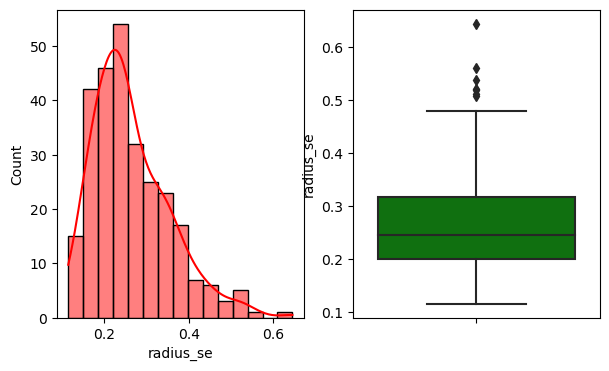

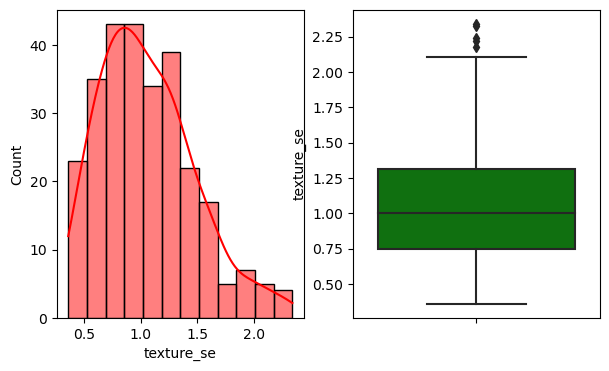

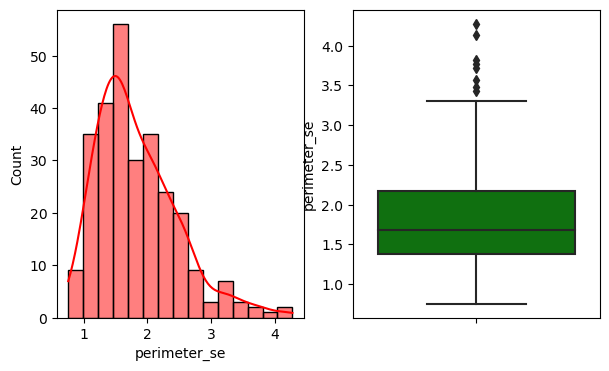

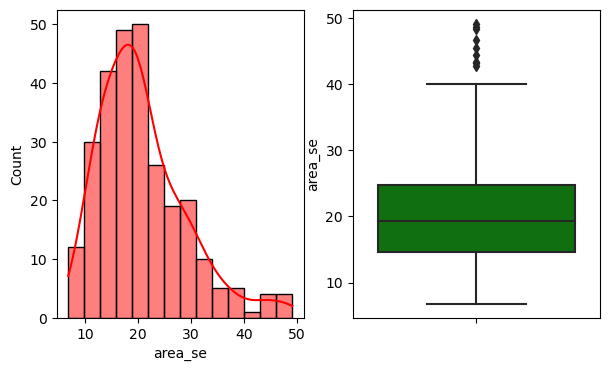

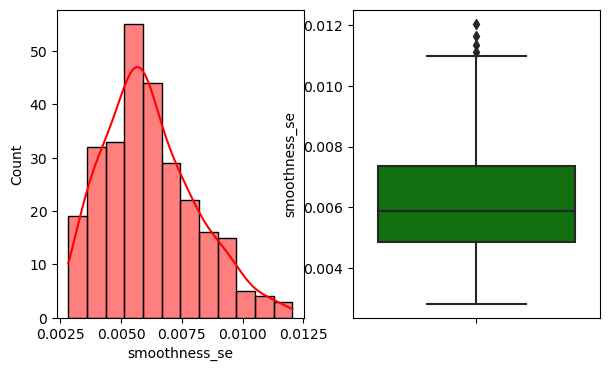

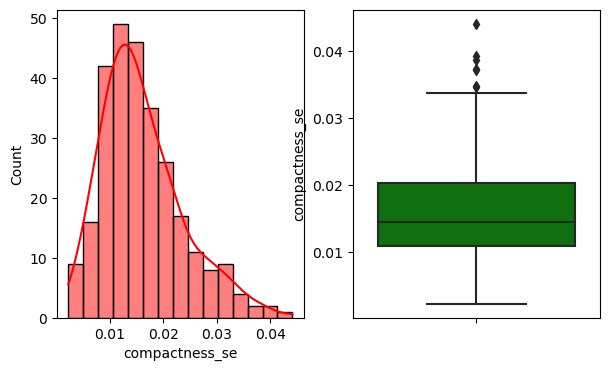

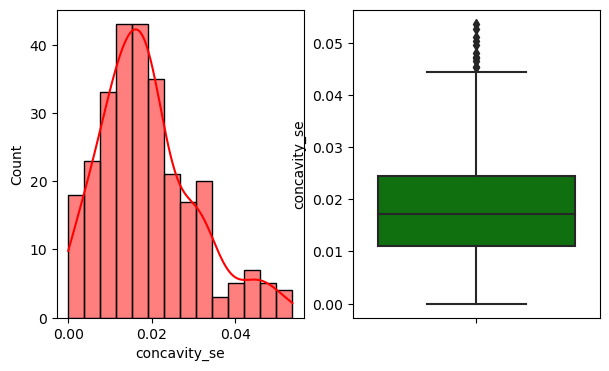

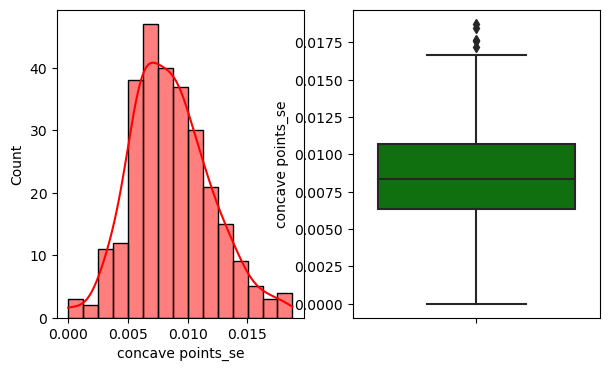

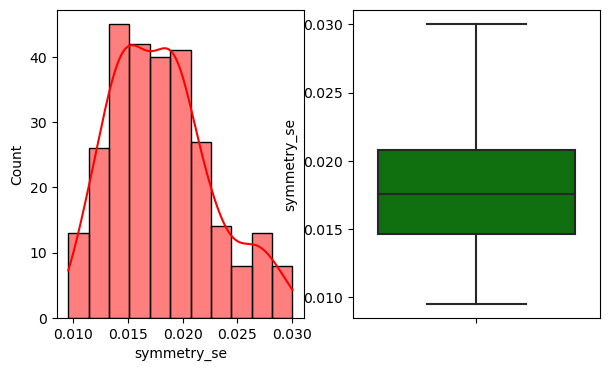

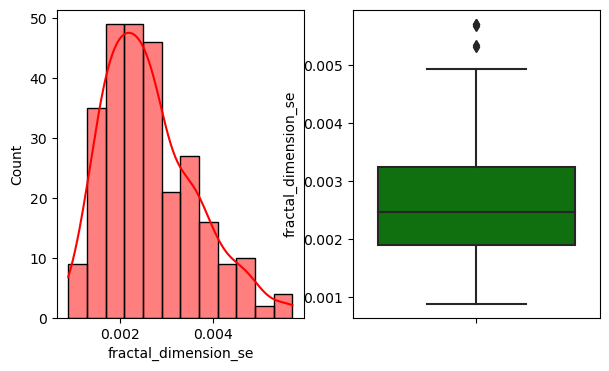

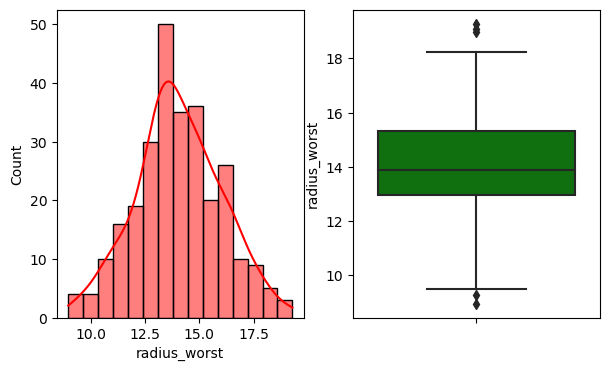

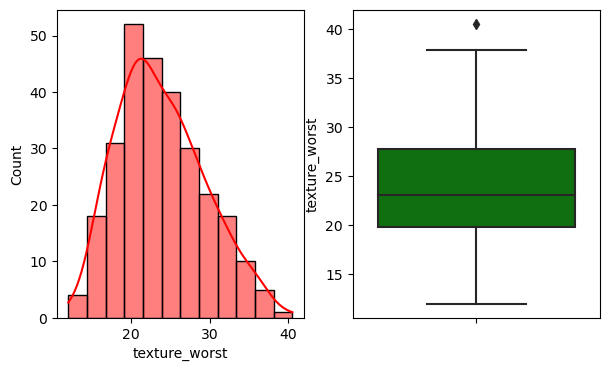

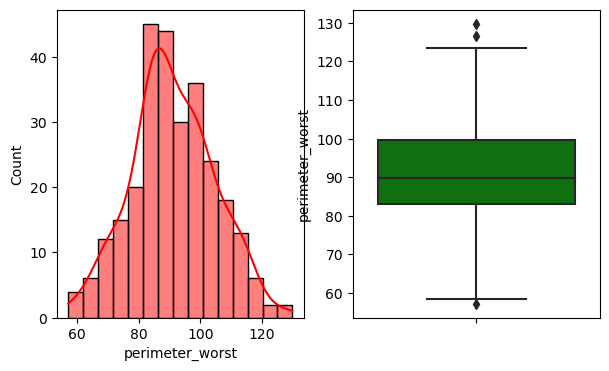

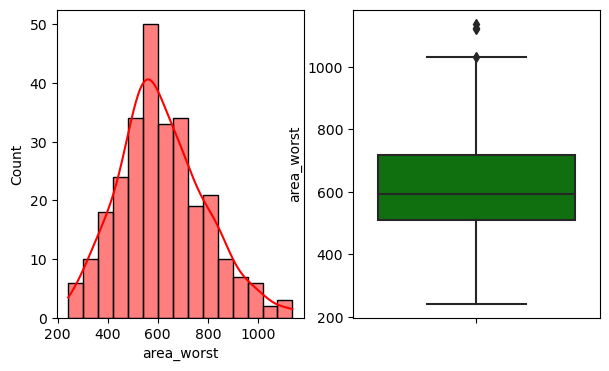

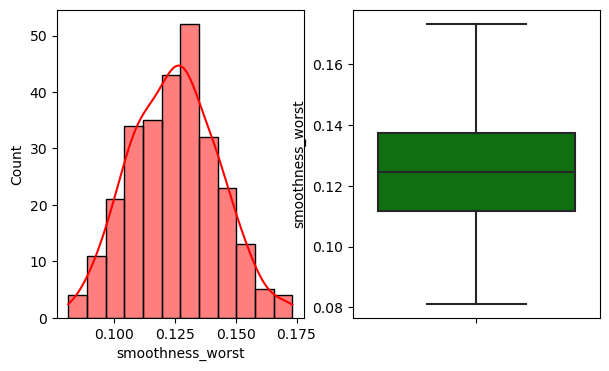

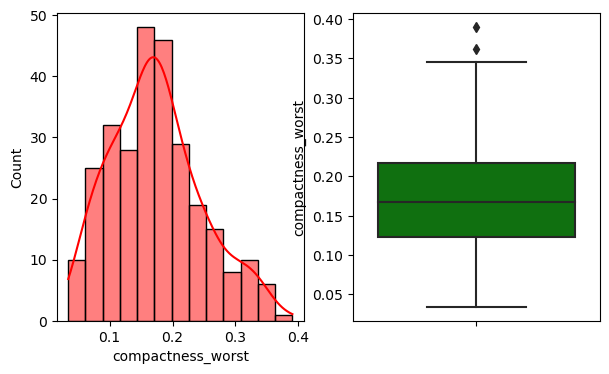

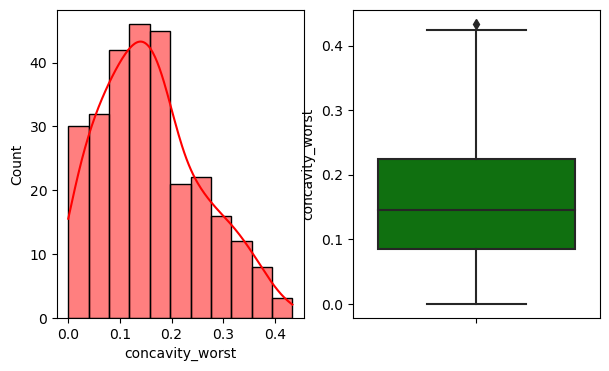

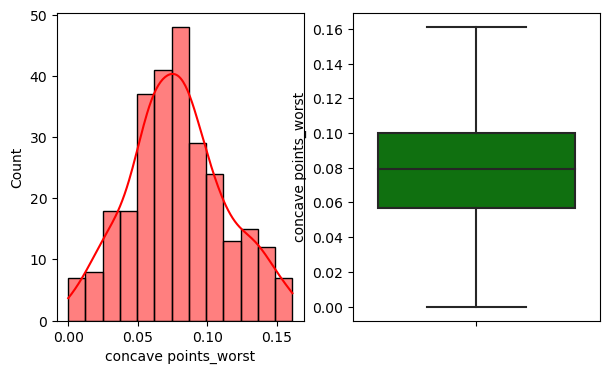

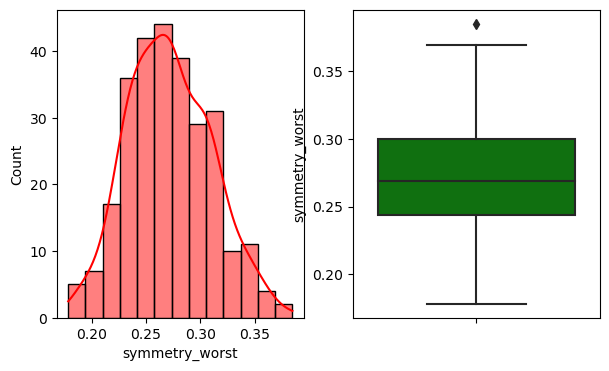

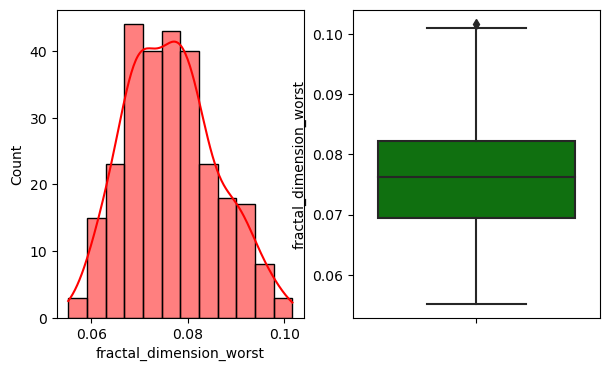

In [267]:
for col in df:
    plt.figure(figsize=(7,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,color='red')
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col],color='green')
#     plt.tight_layout()

    plt.show()

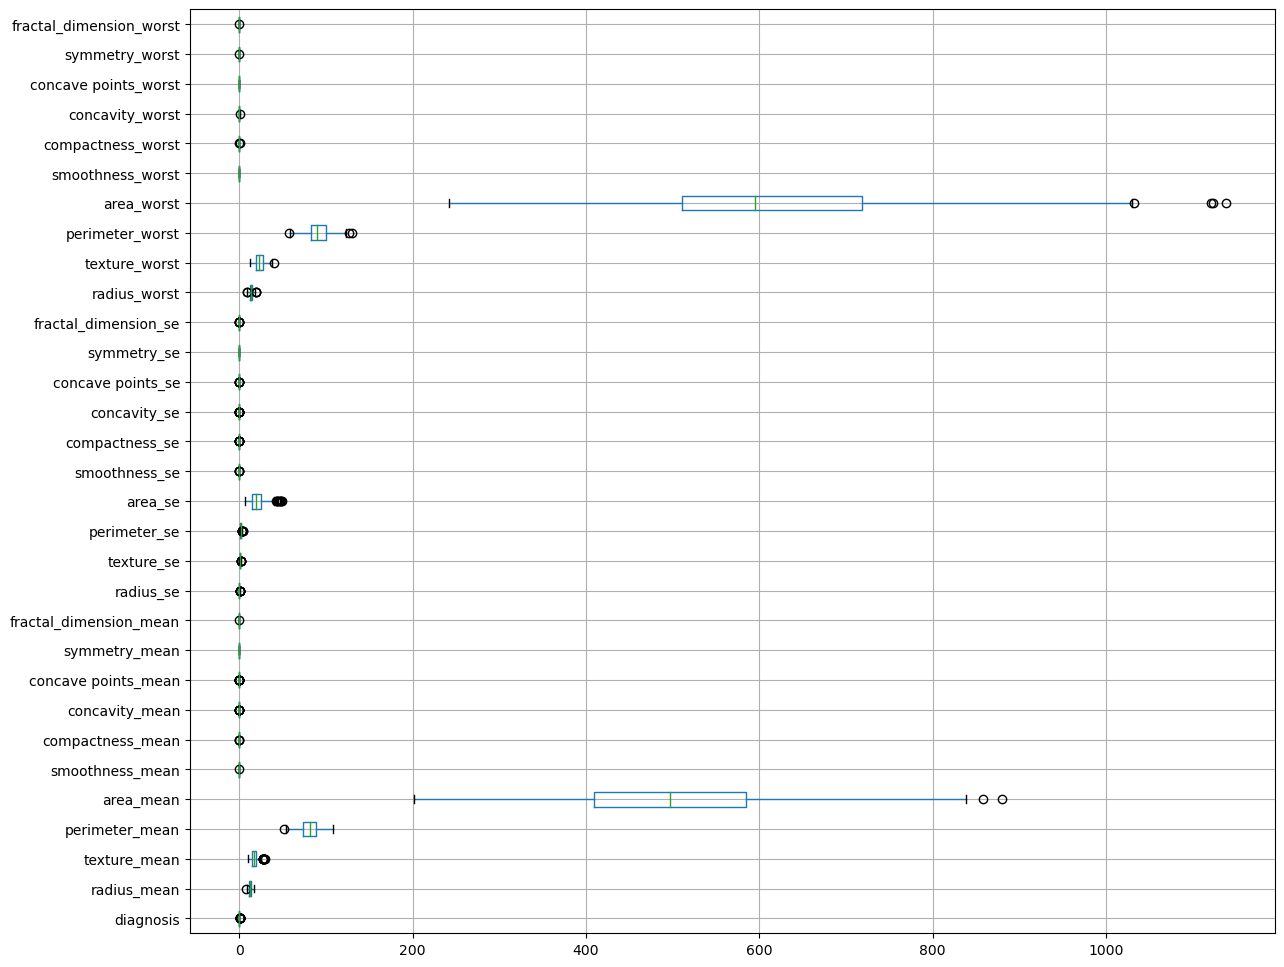

In [268]:
plt.figure(figsize=(14,12))
df.boxplot(vert=0)
plt.show()

In [269]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
16,1,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


### defining features and target variables

In [270]:
x=df.drop(['diagnosis'],axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
16,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [271]:
y=df['diagnosis']
y

16     1
19     0
20     0
21     0
37     0
      ..
552    0
554    0
555    0
560    0
566    1
Name: diagnosis, Length: 277, dtype: int64

### Splitting into train and test data

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [273]:
print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (221, 30)
y_train :  (221,)
x_test :  (56, 30)
y_test :  (56,)


## scaling

# Classification models

## 1.K-Nearest Neighbors (KNN)

In [275]:
knn_model=KNeighborsClassifier(n_neighbors=7)

In [276]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [277]:
y_pred=knn_model.predict(x_test)

In [278]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [279]:
knn_acc=accuracy_score(y_pred,y_test)
knn_acc

0.9642857142857143

In [280]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.33      0.50         3

    accuracy                           0.96        56
   macro avg       0.98      0.67      0.74        56
weighted avg       0.97      0.96      0.96        56



In [281]:
print(confusion_matrix(y_test,y_pred))

[[53  0]
 [ 2  1]]


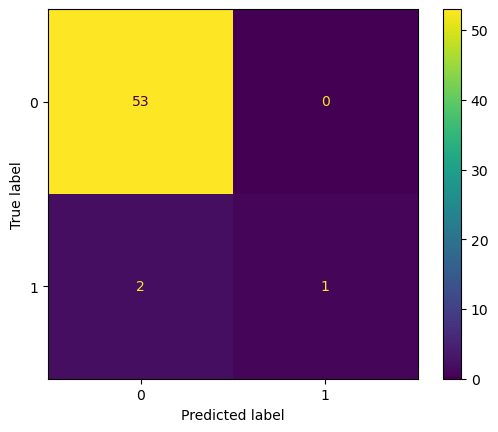

In [282]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## 2.LOGISTIC REGRESSION CLASSIFICATION

In [283]:
log_model=LogisticRegression()

In [284]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [285]:
y_pred_log=log_model.predict(x_test)

In [286]:
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [287]:
log_acc=accuracy_score(y_pred_log,y_test)
log_acc

0.9642857142857143

In [288]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.33      0.50         3

    accuracy                           0.96        56
   macro avg       0.98      0.67      0.74        56
weighted avg       0.97      0.96      0.96        56



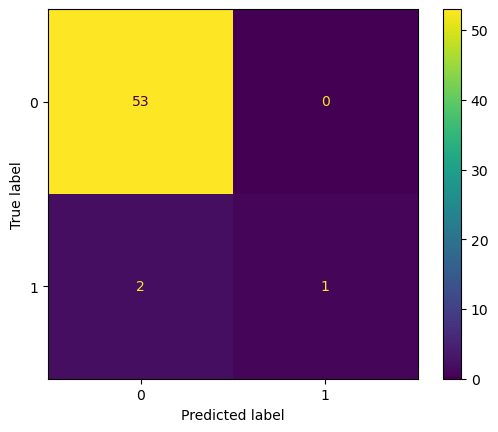

In [289]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log))

## 3.DecisionTreeClassifier

In [290]:
dt_model = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2, class_weight=None, random_state=42, splitter='best')

In [291]:
dt_model

DecisionTreeClassifier(random_state=42)

In [292]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [293]:
y_pred=dt_model.predict(x_test)

In [294]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [295]:
dt_acc=accuracy_score(y_pred,y_test)
dt_acc

0.8214285714285714

In [296]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        53
           1       0.11      0.33      0.17         3

    accuracy                           0.82        56
   macro avg       0.53      0.59      0.53        56
weighted avg       0.91      0.82      0.86        56



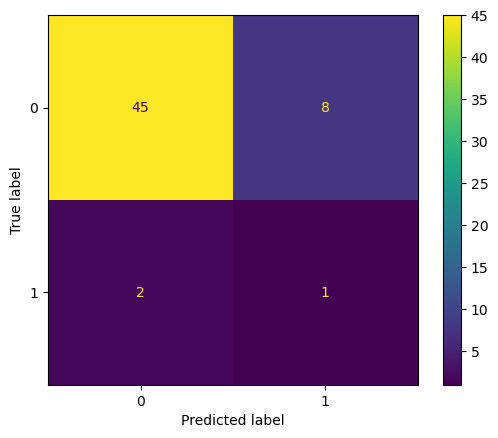

In [297]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## 4.RandomForestClassifier

In [298]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [299]:
y_pred=rf_model.predict(x_test)

In [300]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [301]:
rf_acc=accuracy_score(y_test,y_pred)
rf_acc

0.9464285714285714

In [302]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.50      0.33      0.40         3

    accuracy                           0.95        56
   macro avg       0.73      0.66      0.69        56
weighted avg       0.94      0.95      0.94        56



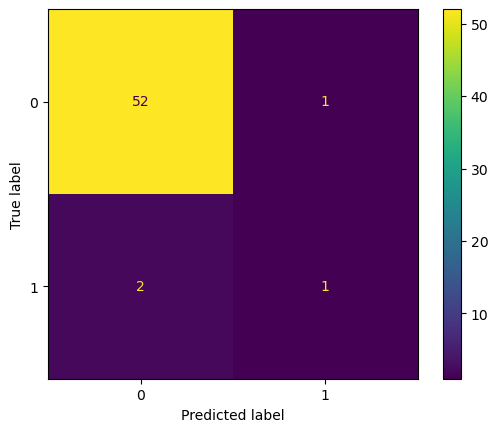

In [303]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [304]:
models=pd.DataFrame({'models':['KNN','Logistic regression','DecisionTreeClassifier','RandomForest'],'Accuracy_score':[knn_acc,log_acc,dt_acc,rf_acc]})

In [305]:
models.sort_values(by='Accuracy_score', ascending=False)

,models,Accuracy_score
0,KNN,0.964286
1,Logistic regression,0.964286
3,RandomForest,0.946429
2,DecisionTreeClassifier,0.821429



Based on the accuracy scores obtained from the models, we can draw the following conclusions:

KNN and Logistic Regression: Both KNN and Logistic Regression models achieved the highest accuracy scores of 96.43%. These models demonstrated excellent performance in accurately predicting the target variable.

Random Forest: The Random Forest model, while still performing well, achieved a slightly lower accuracy score of 94.64%. It remains a strong performer but lags slightly behind KNN and Logistic Regression in this specific scenario.

Decision Tree Classifier: The Decision Tree Classifier showed a lower accuracy score of 82.14%. While it may still be providing valuable insights, its predictive accuracy is comparatively lower than the other models.

In summary, based on the accuracy scores, KNN and Logistic Regression are the top-performing models for this particular dataset, providing accurate predictions for the target variable. Random Forest follows closely behind, while the Decision Tree Classifier exhibits relatively lower accuracy in comparison.